# Predicting Fraudulent Transactions For a Financial Company

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Importing Data set

In [2]:
df = pd.read_csv("Fraud.csv")
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Handling Missing Values

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df = df.drop_duplicates()

In [7]:
df=df.drop(['nameOrig','nameDest'],axis=1)

In [8]:
df_fraud = df[['isFraud','type']].groupby(['isFraud']).count().reset_index()
df_fraud.columns = ['isFraud','count']

df_fraud['percent'] = (df_fraud['count']/df_fraud['count'].sum())*100

df_fraud

,isFraud,count,percent
0,0,6354407,99.870918
1,1,8213,0.129082


In [9]:
values = df['isFraud'].value_counts().values
labels = ['Not Fraud','Fraud']
explode = (0.1,0)

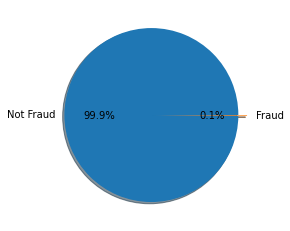

In [10]:
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

### Checking For Outliers

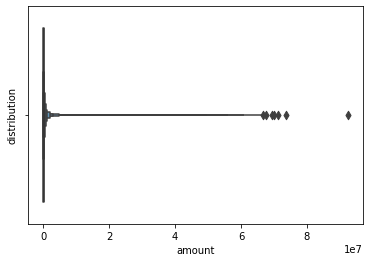

In [11]:
sns.boxenplot(df['amount'])
plt.ylabel('distribution')
plt.show()

Text(0, 0.5, 'distribution')

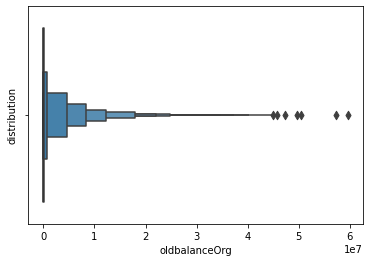

In [12]:
sns.boxenplot(df['oldbalanceOrg'])
plt.ylabel('distribution')

Text(0, 0.5, 'distribution')

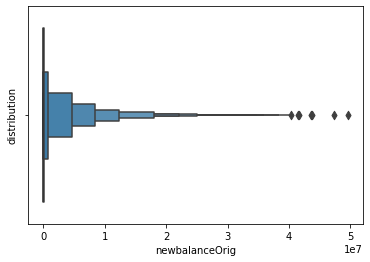

In [13]:
sns.boxenplot(df['newbalanceOrig'])
plt.ylabel('distribution')

Text(0, 0.5, 'distribution')

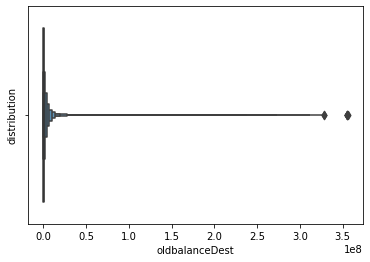

In [14]:
sns.boxenplot(df['oldbalanceDest'])
plt.ylabel('distribution')

Text(0, 0.5, 'distribution')

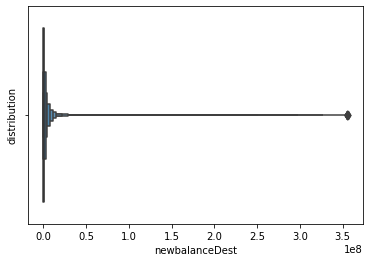

In [15]:
sns.boxenplot(df['newbalanceDest'])
plt.ylabel('distribution')

In [16]:
def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [17]:
df['amount'] = remove_outliers(df,'amount')
df['oldbalanceOrg'] = remove_outliers(df,'oldbalanceOrg')
df['newbalanceOrig'] = remove_outliers(df,'newbalanceOrig')
df['oldbalanceDest'] = remove_outliers(df,'oldbalanceDest')
df['newbalanceDest'] = remove_outliers(df,'newbalanceDest')
df['amount'].fillna(df['amount'].mean(),inplace=True)
df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].mean(),inplace=True)
df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(),inplace=True)
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(),inplace=True)
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(),inplace=True)

### Creating For Dummy Variables

In [18]:
dummy = pd.get_dummies(df[['type']], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [19]:
df = df.drop(['type'],1)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.640000,170136.00000,160296.36,0.00000,0.00000,0,0,0,0,1,0
1,1,1864.280000,21249.00000,19384.72,0.00000,0.00000,0,0,0,0,1,0
2,1,181.000000,181.00000,0.00,0.00000,0.00000,1,0,0,0,0,1
3,1,181.000000,181.00000,0.00,21182.00000,0.00000,1,0,1,0,0,0
4,1,11668.140000,41554.00000,29885.86,0.00000,0.00000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.130000,30663.77495,0.00,0.00000,339682.13000,1,0,1,0,0,0
6362616,743,111534.180303,30663.77495,0.00,0.00000,0.00000,1,0,0,0,0,1
6362617,743,111534.180303,30663.77495,0.00,68488.84000,443910.35578,1,0,1,0,0,0
6362618,743,111534.180303,30663.77495,0.00,0.00000,0.00000,1,0,0,0,0,1


### Checking For Coorelation

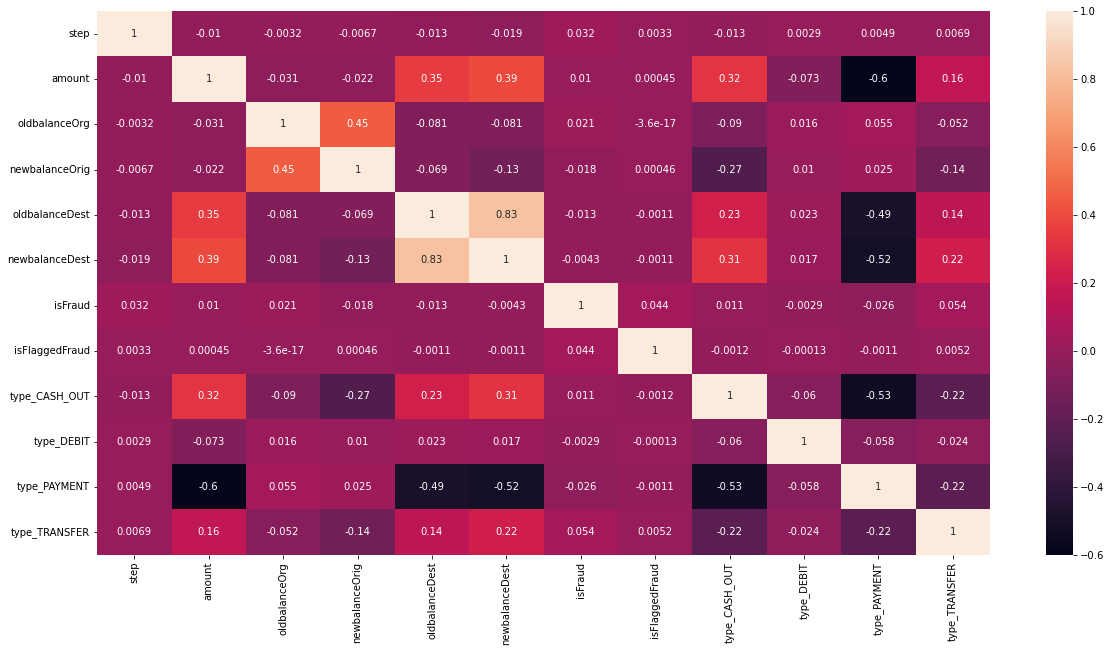

In [20]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [21]:
X= df.drop(['isFraud'],axis=1)
y= df['isFraud']

In [22]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [23]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

### Over-Sampling

In [24]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", X)
print("Shape of y:", y)

Shape of x:            step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0            1    9839.640000  170136.000000       160296.36             0.0   
1            1    1864.280000   21249.000000        19384.72             0.0   
2            1     181.000000     181.000000            0.00             0.0   
3            1     181.000000     181.000000            0.00         21182.0   
4            1   11668.140000   41554.000000        29885.86             0.0   
...        ...            ...            ...             ...             ...   
12708809   159  388968.662672   30663.774950            0.00             0.0   
12708810   610  105667.909533  105667.909533            0.00             0.0   
12708811   405   70601.948507   70601.948507            0.00             0.0   
12708812   583   72939.761807   72939.761807            0.00             0.0   
12708813   558  115545.787265  115545.787265            0.00             0.0   

          newbalanceDest  

In [25]:
X.shape

(12708814, 11)

In [26]:
y.shape

(12708814,)

### Spliting the Data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Model Building

### Building Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,step=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

In [ ]:
# Checking for top variable
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
logreg = LogisticRegression(random_state=42)

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
  y_train_pred = logreg.predict(X_train)
  y_test_pred = logreg.predict(X_test)

### Evaluting model on Train data

In [ ]:
print(confusion_matrix(y_train, y_train_pred))
print()
print(classification_report(y_train, y_train_pred))
print()
print('ROC AUC Score:',roc_auc_score(y_train,y_train_pred))
print()
print('F1 Score:',f1_score(y_train,y_train_pred))
print()
print('Accuracy Score:',accuracy_score(y_train,y_train_pred))

### Evaluting model on Test data

In [ ]:
print(confusion_matrix(y_test, y_test_pred))
print()
print(classification_report(y_test, y_test_pred))
print()
print('ROC AUC Score:',roc_auc_score(y_test,y_test_pred))
print()
print('F1 Score:',f1_score(y_test,y_test_pred))
print()
print('Accuracy Score:',accuracy_score(y_test,y_test_pred))

### Building Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

### Evaluting model on Train data

In [ ]:
print("Train Results")
print()
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print()
print(classification_report(y_train, pred_train))
print()
print('ROC AUC Score:',roc_auc_score(y_train,pred_train))
print()
print('F1 Score:',f1_score(y_train,pred_train))
print()
print('Accuracy Score:',accuracy_score(y_train,pred_train))

### Evaluting model on Test data

In [ ]:
print("Test Results")
print()
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print()
print(classification_report(y_test, pred_test))
print()
print('ROC AUC Score:',roc_auc_score(y_test,pred_test))
print()
print('F1 Score:',f1_score(y_test,pred_test))
print()
print('Accuracy Score:',accuracy_score(y_test,pred_test))


### Building Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
sample_tree = rf.estimators_[10]

### Evaluting model on Train data

In [ ]:
print("Train Results")
y_train_pred_rf = rf.predict(X_train)
print()


print(confusion_matrix(y_train, y_train_pred_rf))
print()
print(classification_report(y_train, y_train_pred_rf))
print()
print('ROC AUC Score:',roc_auc_score(y_train,y_train_pred_rf))
print()
print('F1 Score:',f1_score(y_train,y_train_pred_rf))
print()
print('Accuracy Score:',accuracy_score(y_train,y_train_pred_rf))

### Evaluting model on Test data

In [ ]:
print("Test Results")
print()
y_test_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_test_pred_rf))
print()
print(classification_report(y_test, y_test_pred_rf))
print()
print('ROC AUC Score:',roc_auc_score(y_test,y_test_pred_rf))
print()
print('F1 Score:',f1_score(y_test,y_test_pred_rf))
print()
print('Accuracy Score:',accuracy_score(y_test,y_test_pred_rf))


### Analysis


I have used different Machine Learning Models to detect the fruad transaction that are taking place.

To choose which variable is best for model feature selection was used.
Top variable comes out are - oldbalanceOrg, newbalanceOrg, type_PAYMENT, type_TRANSFER

The Model Built are Logistic Regression Model, Decision tree and Random Forest.
Random forest and Decision Tree modelperform best on train as well as on test data.

The performance of the model is checked by ROC AUC score, Accuracy, F1 Score, Precision and recall.

The key factor that are used to detect fraud transcation are type_PAYMENT, type_Transfer it can be detected that fraudster are 
using are common type of payment and transfer menthod to do the fraud.

The prevention can be using 2 step of verification having a more watch on payment and transfer menthod. Having a eye on how a
normal person do a transaction by keeping a watch on there oldbalanceOrg and newbalanceOrg. If there is something unusual 
detected use 2 step verification for that process.

When these things are implemented the data shoulded be collected again and should be perform again on the model. It will attain
the better accuracy,precision and recall value from the past it scored.


FLOW OF ANALYSIS

1. Data cleaning and data manipulation.
  - Check and handle duplicate data.
  - Check and handle NA values and missing values.
  - Drop columns. If it contains large amount of missing values and not used for analysis.
  - Imputation of the values.
2. EDA
  - Univariate data analysis,values_count,distribution of variable.
  - Bivariate data analysis,correlation coefficients and pattern between the variable.
  - Feature Scaling and Creating Dummy Variable.
  - Performed Oversampling.
  - Building Model: Logistic regression, Decision Tree, Random forest Model used for the model making and prediction.
  - Validation of the model.